Используемая картинка: https://i1.7fon.org/thumb/c127009.jpg



In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [6]:
image = cv2.imread('/content/001.jpg')

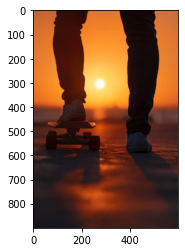

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [11]:
clf = KMeans(n_clusters = 7)
labels = clf.fit_predict(modified_image)

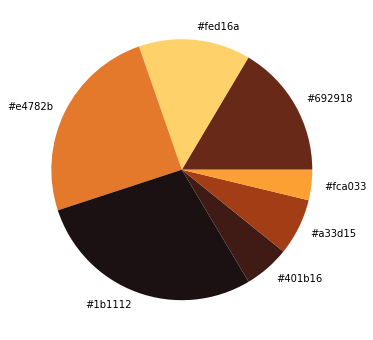

In [12]:
counts = Counter(labels)

center_colors = clf.cluster_centers_

ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6));
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors);

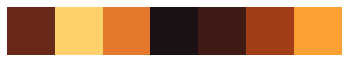

In [13]:
palette = np.array(rgb_colors)[np.newaxis, :, :]

plt.imshow(palette.astype(np.uint8));
plt.axis('off');
plt.show();

In [14]:
import cv2 as cv
import numpy as np
from imageio import imread

image = imread('/content/001.jpg')
img  = cv.cvtColor(np.array(image), cv.COLOR_RGB2BGR)
rows, cols, _ = img.shape

color_B = 0
color_G = 0
color_R = 0
color_N = 0 

for i in range(rows):
    for j in range(cols):
        k = img[i,j]
        if k[0] > k[1] and k[0] > k[2]:
            color_B = color_B + 1
            continue
        if k[1] > k[0] and k[1] > k[2]:
            color_G = color_G + 1
            continue        
        if k[2] > k[0] and k[2] > k[1]:
            color_R = color_R + 1
            continue
        color_N = color_N + 1

pix_total = rows * cols
print('Содержание RGB цветов ------->')
print('Blue:', color_B/pix_total, 'Green:', color_G/pix_total, 'Red:',  color_R/pix_total, 'Gray:',  color_N/pix_total)

Содержание RGB цветов ------->
Blue: 0.0608537037037037 Green: 0.001062962962962963 Red: 0.9349018518518518 Gray: 0.0031814814814814813


In [15]:
# определение среднего цвета

In [16]:
from io import BytesIO

import requests
from PIL import Image

image_url = 'https://i1.7fon.org/thumb/c127009.jpg'  # для удобности - возможность взять файл из интернета

resp = requests.get(image_url)
assert resp.ok
img = Image.open(BytesIO(resp.content))

img2 = img.resize((1, 1))

color = img2.getpixel((0, 0))

print('усредненный цвет:')
print('#{:02x}{:02x}{:02x}'.format(*color))

усредненный цвет:
#723d1e


In [17]:
# нахождение дополнительного цвета (180 градусов от исходного)

In [18]:
r, g, b = [int(i) for i in img2.getpixel((0, 0))]
convertCL = (255 - r, 255 - g, 255 - b)

print('дополнительный цвет:')
print('#{:02x}{:02x}{:02x}'.format(*convertCL))

дополнительный цвет:
#8dc2e1


In [19]:
# определение соседнего цвета к дополнительному (аналогичный цвет)

In [20]:
from math import sqrt
COLORS = (
    (181, 230, 99),
    (23, 186, 241),
    (99, 23, 153),
    (231, 99, 29),
)

def closest_color(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

In [21]:
print('аналогичный цвет:')
print('#{:02x}{:02x}{:02x}'.format(*closest_color(img2.getpixel((0, 0)))))

аналогичный цвет:
#e7631d


In [22]:
!pip install colour

In [ ]:
# нахождение полной палитры возможных цветов (на основании дополнительного)

In [23]:
from colour import Color
red = Color("#723d1e")
colors = list(red.range_to(Color("#8dc2e1"),10))

In [24]:
colors

[<Color #723d1e>,
 <Color #866823>,
 <Color #959928>,
 <Color #7ead2d>,
 <Color #5dc033>,
 <Color #3fcc44>,
 <Color #52d281>,
 <Color #66d7b5>,
 <Color #79d8dc>,
 <Color #8dc2e1>]

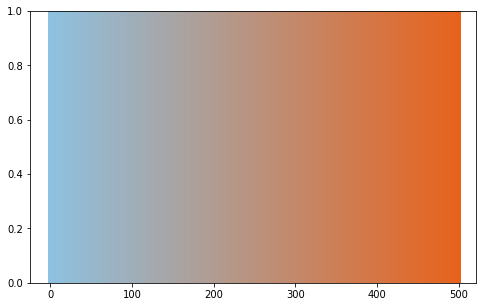

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#8dc2e1'
c2='#e7631d'
n=500

fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=4) 
plt.show()

Цвет является точкой в цветовом пространстве, которое обычно состоит из трех или четырех измерений, таких как RGB или HSL. Для создания линейной интерполяции между двумя точками в этом пространстве требуется просто следовать линии, созданной этими двумя точками. В зависимости от цветового пространства, получается разное продолжение цветов.

In [26]:
!pip install colormath

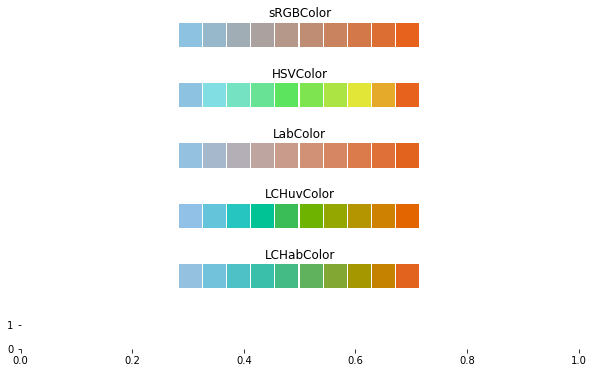

In [29]:
import colormath
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colormath.color_objects import sRGBColor, HSVColor, LabColor, LCHuvColor, XYZColor, LCHabColor
from colormath.color_conversions import convert_color

def hex_to_rgb_color(hex):
    return sRGBColor(*[int(hex[i + 1:i + 3], 16) for i in (0, 2 ,4)], is_upscaled=True)

def plot_color_palette(colors, subplot, title, plt_count):
    ax = fig.add_subplot(plt_count, 1, subplot)
    for sp in ax.spines: ax.spines[sp].set_visible(False)
    for x, color in enumerate(colors):
        ax.add_patch(mpl.patches.Rectangle((x, 0), 0.95, 1, facecolor=color))
    ax.set_xlim((0, len(colors)))
    ax.set_ylim((0, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    plt.title(title)

def create_palette(start_rgb, end_rgb, n, colorspace):
    # преобразование начало и конец в точку в заданном цветовом пространстве
    start = convert_color(start_rgb, colorspace).get_value_tuple()
    end = convert_color(end_rgb, colorspace).get_value_tuple()

    # создание набора из n точек от начала до конца
    points = list(zip(*[np.linspace(start[i], end[i], n) for i in range(3)]))

    # создание цвета для каждой точки и преобразовать обратно в rgb
    rgb_colors = [convert_color(colorspace(*point), sRGBColor) for point in points]

    # преобразвание rgb обратно в hex (стандартный цветовой круг)
    return [color.get_rgb_hex() for color in rgb_colors]

start_color = '#8dc2e1'
end_color ='#e7631d'

number_of_colors = 10
colorspaces = (sRGBColor, HSVColor, LabColor, LCHuvColor, LCHabColor, XYZColor)

start_rgb = hex_to_rgb_color(start_color)
end_rgb = hex_to_rgb_color(end_color)
fig = plt.figure(figsize=(number_of_colors, len(colorspaces)), frameon=False)

for index, colorspace in enumerate(colorspaces):
  try:
    palette = create_palette(start_rgb, end_rgb, number_of_colors, colorspace)
    plot_color_palette(palette, index + 1, colorspace.__name__, len(colorspaces))
  except:
    pass

plt.subplots_adjust(hspace=1.5);
plt.show();